In [58]:
import pandas as pd
import numpy as np
from mplsoccer import Pitch
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/Viz-Templates/master/europaFinal.csv')

In [42]:
df

,level_0,index,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,Starting_position,end_position,progressive
0,9,270,18,18.0,Manchester United,88.20,74.16,FirstHalf,Pass,Unsuccessful,18.0,106.08,46.72,46.670607,15.457193,True
1,14,473,31,58.0,Manchester United,78.48,62.32,FirstHalf,Pass,Successful,18.0,99.60,67.84,47.139079,34.514136,True
2,15,497,32,42.0,Manchester United,82.92,12.24,FirstHalf,Pass,Unsuccessful,18.0,106.20,40.24,46.320017,13.802087,True
3,30,932,52,27.0,Manchester United,111.72,8.32,SecondHalf,Pass,Unsuccessful,18.0,120.00,37.84,32.744172,2.160000,True
4,32,974,56,33.0,Manchester United,83.52,1.76,SecondHalf,Pass,Successful,18.0,117.72,8.56,52.849674,31.522563,True
5,33,1111,63,46.0,Manchester United,92.28,7.28,SecondHalf,Pass,Unsuccessful,18.0,103.80,26.72,42.883526,20.947515,True
6,37,1181,67,51.0,Manchester United,88.44,67.84,SecondHalf,Pass,Unsuccessful,18.0,116.16,34.48,42.084429,6.724284,True
7,38,1220,70,45.0,Manchester United,48.84,72.40,SecondHalf,Pass,Successful,18.0,79.68,75.84,78.188910,53.946344,True
8,48,1428,85,5.0,Manchester United,109.80,67.04,SecondHalf,Pass,Successful,18.0,107.16,40.08,28.899855,12.840249,True
9,52,1646,96,8.0,Manchester United,45.84,20.16,FirstPeriodOfExtraTime,Pass,Unsuccessful,18.0,88.56,42.48,76.768035,31.537660,True


In [28]:
# filter all the passes made by bruno fernandes against Villarreal in europa final 2021

df = df.loc[(df['teamId']=='Manchester United')]

In [30]:
df = df.loc[(df['type']=='Pass')]

In [32]:
df = df.loc[(df['playerId']==18.0)].reset_index()

In [40]:
df = df.loc[(df['progressive']==True)].reset_index()

In [34]:
#adjusting the scale to match the statsbomb standard pitch sizes

df['x'] = df['x']* 1.2
df['y'] = df['y']* 0.8
df['endX'] = df['endX']* 1.2
df['endY'] = df['endY']* 0.8

In [36]:
# Distances between starting position from goal & end position from goal

df['Starting_position'] = np.sqrt(np.square(120-df['x']) + np.square(40-df['y']))
df['end_position'] = np.sqrt(np.square(120-df['endX']) + np.square(40-df['endY']))


In [38]:
# loops through to check if distance btwn end to goal & starting to goal falls within 75% to qualify as a progressive pass

df['progressive'] = [(df['end_position'][x]) / (df['Starting_position'][x]) <.75 for x in range(len(df.Starting_position))]

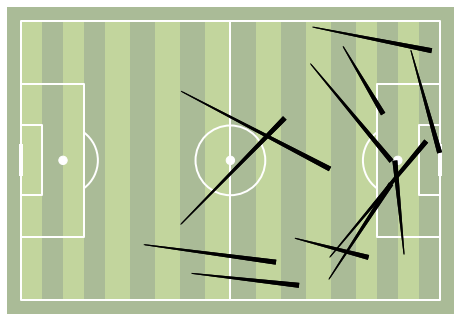

In [50]:
#Plotting the passes on the pitch

pitch = Pitch(pitch_type = 'statsbomb',spot_scale=0.01,pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True)
fig,ax = pitch.draw(figsize=(6.5,6.5))

pitch.lines(df['x'],df['y'],df['endX'],df['endY'],comet = True,color='black' ,ax=ax)